In [1]:
#EP PHYS 512
#Question 2

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy import special

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

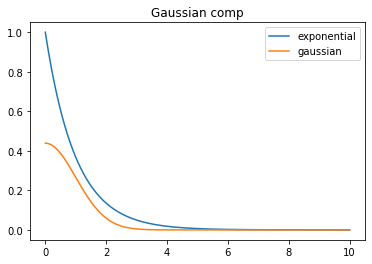

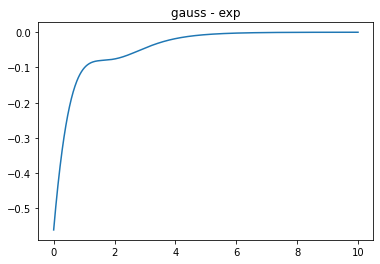

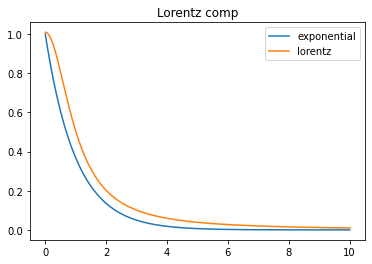

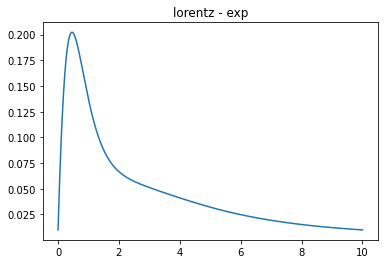

/home/elizabeth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


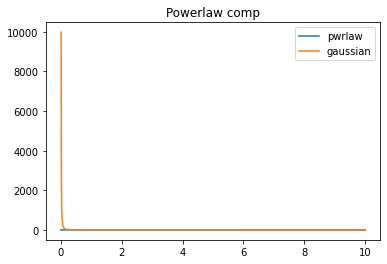

In [3]:
#Rejection method to generate exponential deviates.

#want to generate exponential probability distribution
x_max = 10
x = np.linspace(0, x_max, 1000)
pdf = np.exp(-x)

### POSSIBLE COMPARISON FUNCTIONS ###

#lorentzian
def lorentz(x, a):
    return a*1/(1+(x)**2)

#powerlaw
def pwrlaw(x):
    return x**(-2)

#gaussian
def gauss(x, mu, sig, a):
    return a/(sig*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2))

# gaussian comp
mpl.figure()
mpl.plot(x, pdf)
mpl.plot(x, gauss(x, 0, 1, 1.1))
mpl.title('Gaussian comp')
mpl.legend(['exponential', 'gaussian'])
mpl.show()

mpl.figure()
mpl.plot(x, gauss(x, 0, 1, 1.1) - pdf)
mpl.title('gauss - exp')
mpl.show()


#lorentzian comp
a = 1.01
mpl.figure()
mpl.plot(x, pdf)
mpl.plot(x, lorentz(x, a))
mpl.title('Lorentz comp')
mpl.legend(['exponential', 'lorentz'])
mpl.show()

mpl.figure()
mpl.plot(x, lorentz(x, a) - pdf)
mpl.title('lorentz - exp')
mpl.show()



mpl.figure()
mpl.plot(x, pdf)
mpl.plot(x, pwrlaw(x))
mpl.title('Powerlaw comp')
mpl.legend(['pwrlaw', 'gaussian'])
mpl.show()

Both the lorentzian and gaussian are good comparison functions for the exponential; they are finite and above the exponential function everywhere. As well, the lorentzian has an analytic integral that can be inverted, and the gaussian has an available scipy function (erfinv) that will invert the error function (the integral of the gaussian).

However the powerlaw blows up to infinity at x=0 and so is unsuitable for being a comparison function.

[-3.1373475   1.78048442 -3.62927362 ... -1.13339594  2.58358025
  0.32795881]


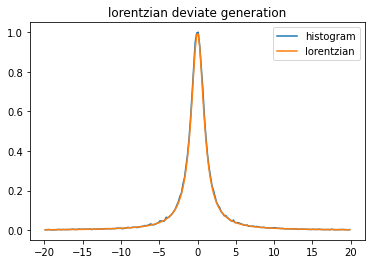

In [4]:
#perform rejection method with lorentzian

#lorentzian
#this returns an x values from from lorentzian distribution
def lorentz_dev(n, a):
    z = np.random.rand(n)
    return a*np.tan(np.pi*(z-0.5))

#first step: lorentzian deviate generation
a = 1.01
n = 100000

y = lorentz_dev(n, a)
print(y)

yy = y[np.abs(y)<20]
vals, bins = np.histogram(yy, 200)
bb = 0.5*(bins[1:] + bins[:-1]) #centers of bins

mpl.figure()
mpl.plot(bb, vals/vals.max()) #normalized histogram
mpl.plot(bb, lorentz(bb, 1)) #lorentzian
mpl.legend(['histogram', 'lorentzian'])
mpl.title('lorentzian deviate generation')
mpl.show()

(1, 315504)


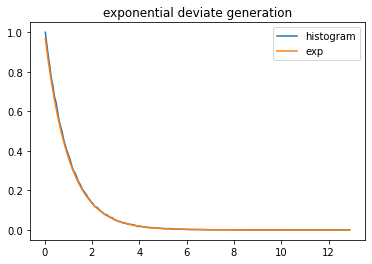

accept fraction is  0.6311443271746697
(1, 314570)


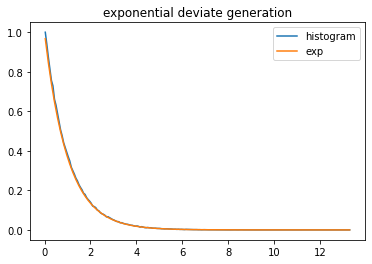

In [5]:
#second step: 
#second random deviate is between 0 and lorentz(x). probability of acceptance is p(x0).
a = 1.01
n = 1000000

x = lorentz_dev(n, 1)
idx1 = np.where(x >= 0)
x = x[idx1]

#second random deviate drawn randomly between zero and the comparison function for that x point
test = np.random.rand(len(x))*lorentz(x, a)
#if this second deviate is within the exponential function than keep it
idx_keep = np.array(np.where(np.exp(-x) > test))
print(idx_keep.shape)

vals, bins = np.histogram(x[idx_keep], 200)
bb = 0.5*(bins[1:] + bins[:-1]) #centers of bins

mpl.figure()
mpl.plot(bb, vals/vals.max()) #normalized histogram
mpl.plot(bb, np.exp(-bb)) #exp
mpl.legend(['histogram', 'exp'])
mpl.title('exponential deviate generation')
mpl.show()

print('accept fraction is ', (idx_keep.shape[1])/len(x))


#or equivalently use JSievers method from class
idx_keep2 = np.array(np.where(np.random.rand(len(x)) < np.exp(-x)/lorentz(x, 1.01)))
print(idx_keep2.shape)

vals, bins = np.histogram(x[idx_keep2], 200)
bb = 0.5*(bins[1:] + bins[:-1]) #centers of bins

mpl.figure()
mpl.plot(bb, vals/vals.max()) #normalized histogram
mpl.plot(bb, np.exp(-bb)) #exp
mpl.legend(['histogram', 'exp'])
mpl.title('exponential deviate generation')
mpl.show()

Maximum efficiency you can achieve, if you really finetune your comparison function to be juuuust above your exponential function, so that you get an accept fraction close to 1, is 1/2. This is because there are two random number generations for each output point. So even if each point is accepted, you've still had to generate two random numbers to get it. My accept fraction is about 0.63, so about one exponential deviate for every three random inputs.